In [2]:
library(survival)
library(ggplot2)
library(survminer)
library(survMisc)

Loading required package: ggpubr
Loading required package: magrittr

Attaching package: ‘survMisc’

The following object is masked from ‘package:ggplot2’:

    autoplot



## Get the data scraped through Python

### Arp 2-3

In [3]:
df = read.csv("data_base_arp23", header=TRUE) #expression data for wave complex

In [4]:
head(df)

X,expressionACTR2,expressionACTR3,expressionARPC1A,expressionARPC2,expressionARPC3,expressionARPC4,expressionARPC5,expressionACTR3B,expressionARPC1B,expressionARPC5L,survival,event
0,20.01,17.56,20.07,18.56,19.94,18.57,17.33,15.82,19.35,17.58,4047,0
1,20.45,19.00,20.39,19.37,20.31,19.78,18.25,14.71,19.76,18.78,4005,0
2,20.36,18.34,20.11,19.45,21.54,20.01,18.85,14.81,20.61,19.22,1474,0
3,20.23,18.44,19.85,19.76,20.67,19.65,18.55,14.56,19.42,18.17,1448,0
4,20.05,18.02,19.69,19.68,20.30,19.31,18.08,15.32,19.14,18.14,348,0
5,19.92,18.27,20.18,19.82,20.51,19.79,18.45,15.14,19.74,18.24,1477,0


### Plot the data

In [5]:
fit <- survfit(Surv(survival, event) ~ 1,  type="kaplan-meier", conf.type="log", data=df)

Warning message in .pvalue(fit, data = data, method = method, pval = pval, pval.coord = pval.coord, :
“There are no survival curves to be compared. 
 This is a null model.”

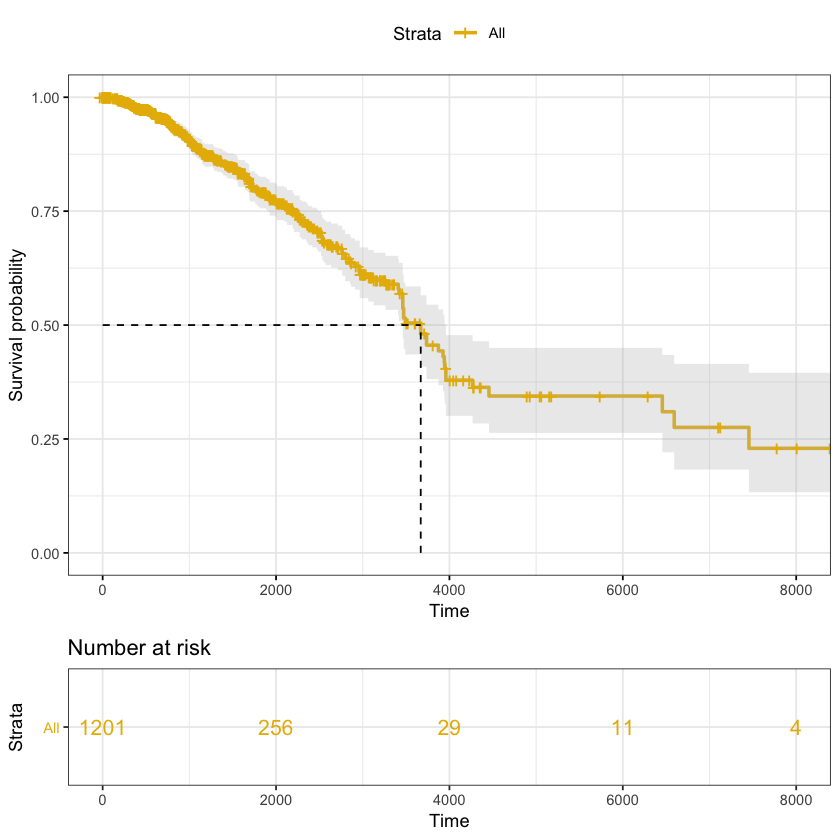

In [6]:
# Change color, linetype by strata, risk.table color by strata
ggsurvplot(fit,
          pval = TRUE, conf.int = TRUE,
          risk.table = TRUE, # Add risk table
          risk.table.col = "strata", # Change risk table color by groups
          linetype = "strata", # Change line type by groups
          surv.median.line = "hv", # Specify median survival
          ggtheme = theme_bw(), # Change ggplot2 theme
          palette = c("#E7B800", "#2E9FDF"))

### Cox regression

In [7]:
res.cox1 <- coxph(Surv(survival, event) ~ expressionACTR2 + expressionACTR3 + expressionARPC1A + expressionARPC2 + expressionARPC3 + expressionARPC4 + expressionARPC5 + expressionACTR3B + expressionARPC1B + expressionARPC5L, data =  df)

In [8]:
#res.cox2 <- coxph(Surv(survival, event) ~ expressionNCKAP1 + expressionARPIN + strata(expressionPICK1) + expressionWASF1 + expressionCYFIP1 + expressionABI1 + expressionBRK1, data =  df)

In [9]:
summary(res.cox1)

Call:
coxph(formula = Surv(survival, event) ~ expressionACTR2 + expressionACTR3 + 
    expressionARPC1A + expressionARPC2 + expressionARPC3 + expressionARPC4 + 
    expressionARPC5 + expressionACTR3B + expressionARPC1B + expressionARPC5L, 
    data = df)

  n= 1203, number of events= 200 

                    coef exp(coef) se(coef)      z Pr(>|z|)  
expressionACTR2  -0.1759    0.8387   0.2472 -0.711   0.4769  
expressionACTR3   0.1114    1.1179   0.2664  0.418   0.6757  
expressionARPC1A  0.1068    1.1127   0.1881  0.568   0.5701  
expressionARPC2   0.1664    1.1811   0.2378  0.700   0.4841  
expressionARPC3  -0.2205    0.8021   0.1776 -1.242   0.2143  
expressionARPC4  -0.1270    0.8807   0.2193 -0.579   0.5625  
expressionARPC5   0.1379    1.1478   0.1870  0.737   0.4609  
expressionACTR3B -0.2005    0.8183   0.1000 -2.004   0.0450 *
expressionARPC1B -0.2465    0.7815   0.1144 -2.156   0.0311 *
expressionARPC5L  0.0607    1.0626   0.1714  0.354   0.7232  
---
Signif. codes:  0 ‘***’

In [10]:
summary(res.cox1)$coef

,coef,exp(coef),se(coef),z,Pr(>|z|)
expressionACTR2,-0.17586823,0.8387285,0.2472377,-0.7113326,0.47687813
expressionACTR3,0.11144118,1.1178880,0.2663821,0.4183508,0.67569065
expressionARPC1A,0.10682703,1.1127418,0.1881269,0.5678457,0.57013974
expressionARPC2,0.16642892,1.1810796,0.2378300,0.6997809,0.48406413
expressionARPC3,-0.22049626,0.8021206,0.1775763,-1.2416984,0.21434788
expressionARPC4,-0.12703260,0.8807050,0.2193313,-0.5791813,0.56246685
expressionARPC5,0.13787233,1.1478290,0.1869909,0.7373211,0.46092708
expressionACTR3B,-0.20047265,0.8183439,0.1000170,-2.0043863,0.04502870
expressionARPC1B,-0.24653619,0.7815031,0.1143619,-2.1557552,0.03110278
expressionARPC5L,0.06069945,1.0625795,0.1713843,0.3541716,0.72321031


In [14]:
write.csv(summary(res.cox1)$coef, "data_for_report_arp23")

#### Test the assumptions of the cox regression

In [11]:
test.ph <- cox.zph(res.cox1)
test.ph        # a low p value indicate a deviation from the proportional hazard hypothesis

                     rho   chisq      p
expressionACTR2  -0.0539  0.6821 0.4089
expressionACTR3   0.0198  0.0913 0.7626
expressionARPC1A -0.0978  1.6346 0.2011
expressionARPC2   0.0588  0.7629 0.3824
expressionARPC3   0.0683  0.9212 0.3372
expressionARPC4  -0.0467  0.4896 0.4841
expressionARPC5  -0.1122  2.8708 0.0902
expressionACTR3B -0.0248  0.1194 0.7297
expressionARPC1B -0.0903  1.6129 0.2041
expressionARPC5L -0.0321  0.1976 0.6567
GLOBAL                NA 22.4365 0.0130

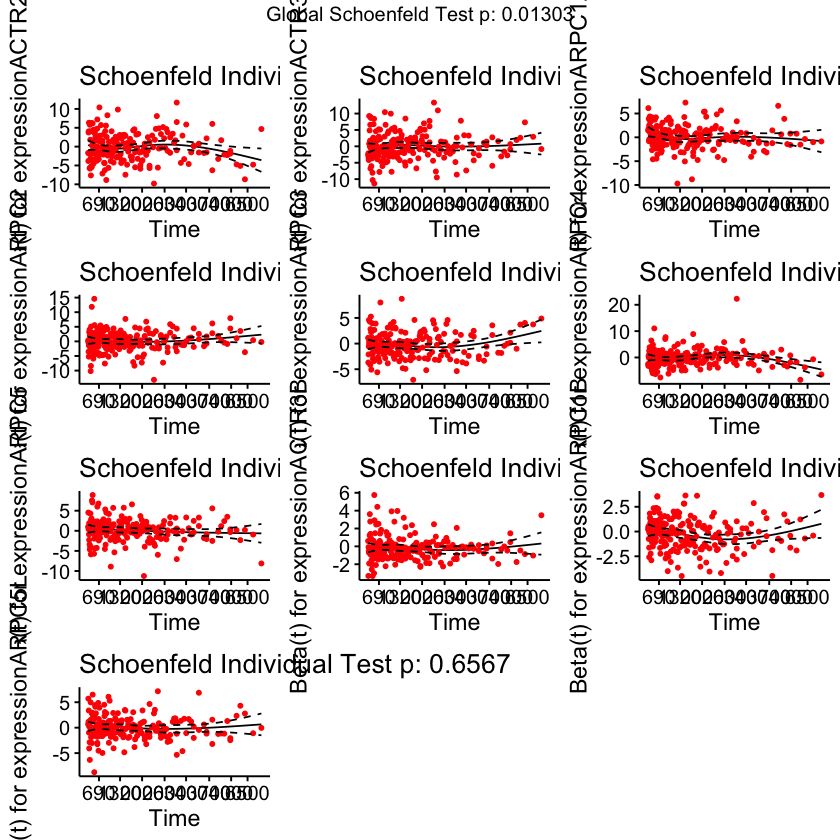

In [68]:
ggcoxzph(test.ph) ##it's supposed to be independant of time

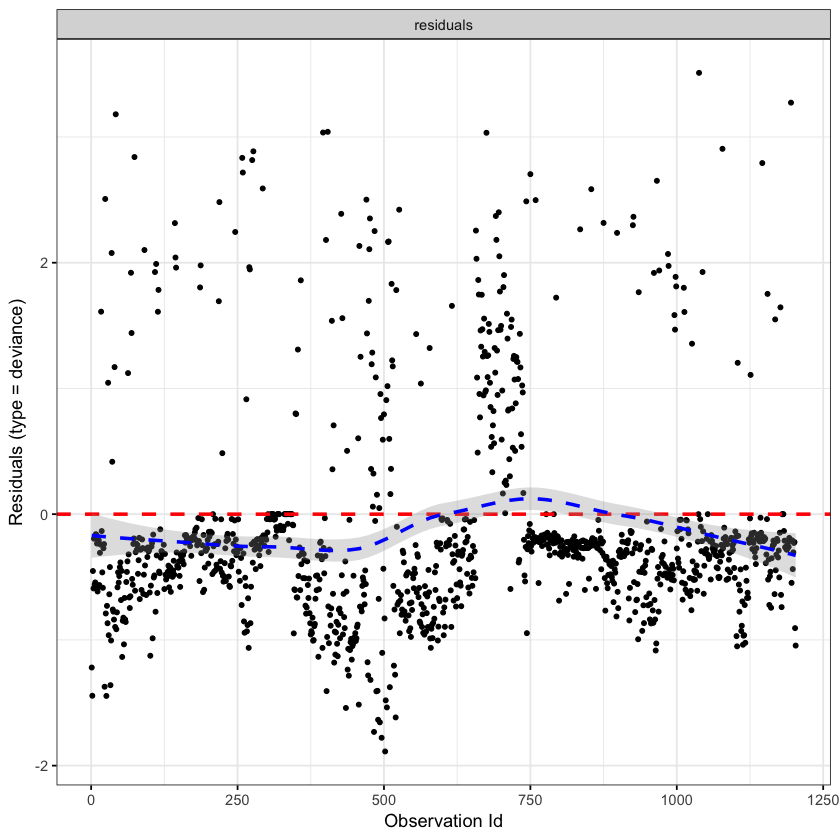

In [12]:
ggcoxdiagnostics(res.cox1, type = "deviance",
                 linear.predictions = FALSE, ggtheme = theme_bw())   # another diagnosis (blue line should be horizontal)

In [72]:
# to test linearity (not sure how to interpret)
ggcoxfunctional(Surv(survival, event) ~ expressionNCKAP1 + expressionARPIN + expressionPICK1 + expressionWASF1 + expressionCYFIP1 + expressionABI1 + expressionBRK1, fit=fit, data = df)

Warning message:
“arguments formula is deprecated; will be removed in the next version; please use fit instead.”

ERROR: Error in eval(predvars, data, env): objet 'expressionNCKAP1' introuvable


## KM Plot

##### Find the optimal cut-off for km plot

In [27]:
df.cut <- surv_cutpoint(
   df,
   time = "survival",
   event = "event",
   variables = c("expressionACTR3B")
)


In [28]:
df.cat <- surv_categorize(df.cut) 

##### Make the km plot

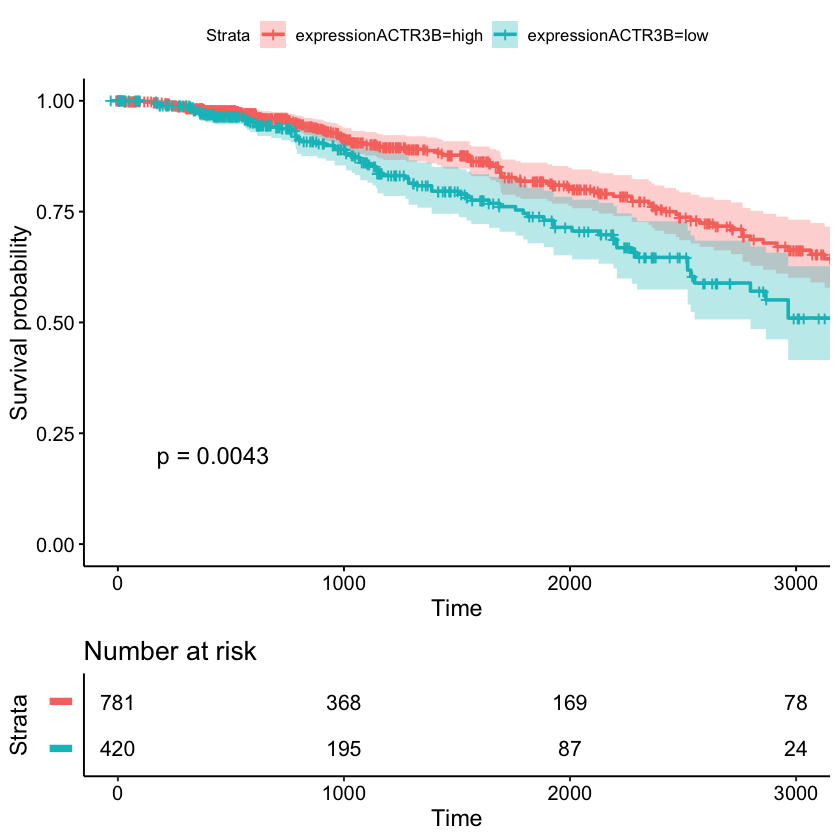

In [29]:
fit <- survfit(Surv(survival, event) ~ expressionACTR3B,
               data = df.cat)
ggsurvplot(
   fit,                     # survfit object with calculated statistics.
   risk.table = TRUE,       # show risk table.
   pval = TRUE,             # show p-value of log-rank test.
   conf.int = TRUE,         # show confidence intervals for 
                            # point estimaes of survival curves.
   xlim = c(0,3000),        # present narrower X axis, but not affect
                            # survival estimates.
   break.time.by = 1000,    # break X axis in time intervals by 500.
                             # customize plot and risk table with a theme.
 risk.table.y.text.col = T, # colour risk table text annotations.
  risk.table.y.text = FALSE # show bars instead of names in text annotations
                            # in legend of risk table
)

In [49]:
df.cut <- surv_cutpoint(
   df,
   time = "survival",
   event = "event",
   variables = c("expressionARPC1B")
)

df.cat <- surv_categorize(df.cut) 

fit <- survfit(Surv(survival, event) ~ expressionARPC1B,
               data = df.cat)

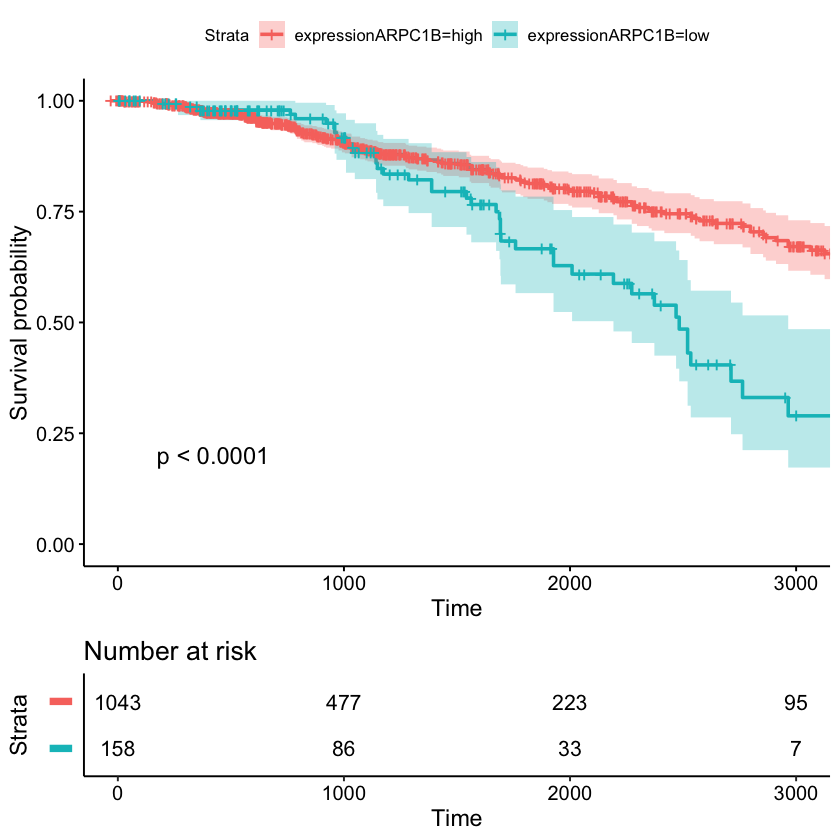

In [50]:
ggsurvplot(
   fit,                     # survfit object with calculated statistics.
   risk.table = TRUE,       # show risk table.
   pval = TRUE,             # show p-value of log-rank test.
   conf.int = TRUE,         # show confidence intervals for 
                            # point estimaes of survival curves.
   xlim = c(0,3000),        # present narrower X axis, but not affect
                            # survival estimates.
   break.time.by = 1000,    # break X axis in time intervals by 500.
                             # customize plot and risk table with a theme.
 risk.table.y.text.col = T, # colour risk table text annotations.
  risk.table.y.text = FALSE # show bars instead of names in text annotations
                            # in legend of risk table
)

# Analyse Arpin results

In [33]:
df_arpin = read.csv("data_base_arpin", header=TRUE) #expression data for wave complex

In [52]:
res.cox1 <- coxph(Surv(survival, event) ~  expressionArpin, data =  df_arpin)

In [55]:
summary(res.cox1) #doesn't work

Call:
coxph(formula = Surv(survival, event) ~ expressionArpin, data = df_arpin)

  n= 1203, number of events= 200 

                  coef exp(coef) se(coef)     z Pr(>|z|)
expressionArpin 0.1016    1.1070   0.0981 1.036      0.3

                exp(coef) exp(-coef) lower .95 upper .95
expressionArpin     1.107     0.9034    0.9133     1.342

Concordance= 0.518  (se = 0.025 )
Rsquare= 0.001   (max possible= 0.853 )
Likelihood ratio test= 1.09  on 1 df,   p=0.3
Wald test            = 1.07  on 1 df,   p=0.3
Score (logrank) test = 1.07  on 1 df,   p=0.3


In [56]:
# find optimal cut-off

df_arpin.cut <- surv_cutpoint(
   df_arpin,
   time = "survival",
   event = "event",
   variables = c("expressionArpin")
)

df_arpin.cat <- surv_categorize(df_arpin.cut) 

fit <- survfit(Surv(survival, event) ~ expressionArpin,
               data = df_arpin.cat)

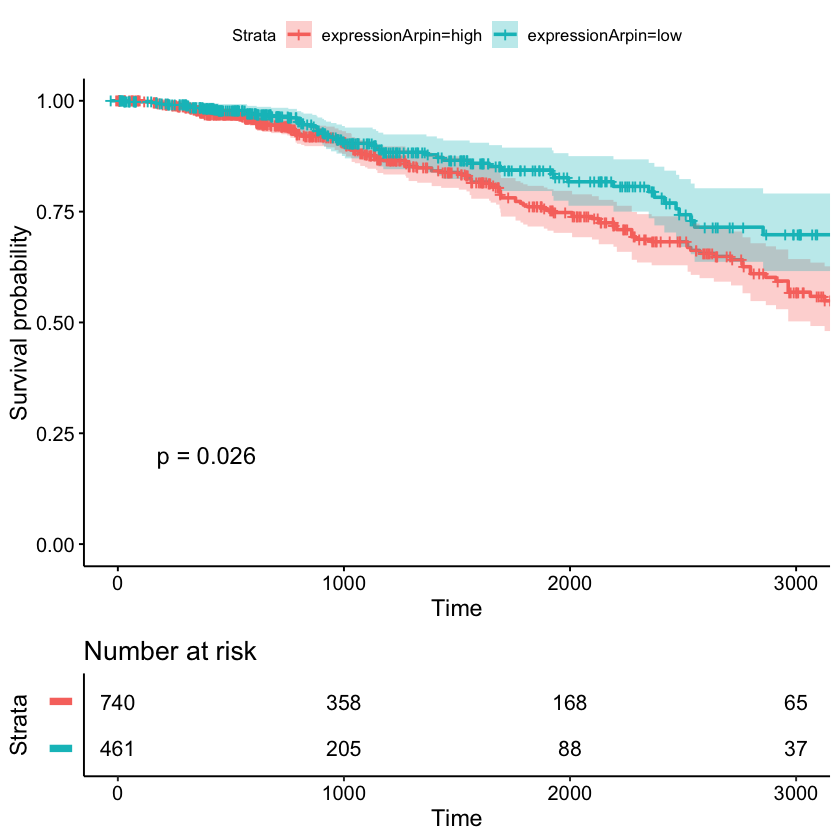

In [57]:
ggsurvplot(
   fit,                     # survfit object with calculated statistics.
   risk.table = TRUE,       # show risk table.
   pval = TRUE,             # show p-value of log-rank test.
   conf.int = TRUE,         # show confidence intervals for 
                            # point estimaes of survival curves.
   xlim = c(0,3000),        # present narrower X axis, but not affect
                            # survival estimates.
   break.time.by = 1000,    # break X axis in time intervals by 500.
                             # customize plot and risk table with a theme.
 risk.table.y.text.col = T, # colour risk table text annotations.
  risk.table.y.text = FALSE # show bars instead of names in text annotations
                            # in legend of risk table
)